# Exoplanets

Querying NASA's exoplanet archive https://exoplanetarchive.ipac.caltech.edu/

In [8]:
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#plt.style.use("fivethirtyeight")
sns.set()
sns.set_style('whitegrid')

In [2]:
sns.__version__

'0.11.1'

In [3]:
NasaExoplanetArchive.query_criteria(table="exoplanets", select="count(*)")

count(*)
arcsec
float64
4367.0


available columns:
https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html#defaultcol

In [4]:
planets_table = NasaExoplanetArchive.query_criteria(table="exoplanets", select="pl_hostname, pl_name, pl_discmethod, pl_pnum, pl_orbper, pl_radj, st_dist, st_mass, st_rad, st_teff, pl_bmassj, pl_facility, pl_disc, ra, dec")

In [5]:
df_planets = planets_table.to_pandas()
df_planets

,pl_hostname,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_radj,st_dist,st_mass,st_rad,st_teff,pl_bmassj,pl_facility,pl_disc,ra,dec,sky_coord.ra,sky_coord.dec
0,HD 180314,HD 180314 b,Radial Velocity,1,396.03000,0.000,122.79,2.20,8.13,4924.0,20.13000,Subaru Telescope,2010,288.709198,31.860350,288.709198,31.860350
1,HD 180902,HD 180902 b,Radial Velocity,1,510.90000,0.000,104.89,1.41,4.16,4961.0,1.68500,W. M. Keck Observatory,2009,289.823792,-23.558155,289.823792,-23.558155
2,HD 181342,HD 181342 b,Radial Velocity,1,564.10000,0.000,120.81,1.69,4.71,4945.0,2.54000,W. M. Keck Observatory,2009,290.267639,-23.619572,290.267639,-23.619572
3,HD 181433,HD 181433 b,Radial Velocity,3,9.37430,0.000,26.90,0.63,0.79,4918.0,0.02000,La Silla Observatory,2008,291.289856,-66.468796,291.289856,-66.468796
4,HD 181433,HD 181433 c,Radial Velocity,3,962.00000,0.000,26.90,0.63,0.79,4918.0,0.64000,La Silla Observatory,2008,291.289856,-66.468796,291.289856,-66.468796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4362,K2-285,K2-285 e,Transit,4,14.76289,0.174,155.65,0.83,0.79,4975.0,0.03367,K2,2018,349.384277,1.300290,349.384277,1.300290
4363,HD 219666,HD 219666 b,Transit,1,6.03607,0.420,94.43,0.92,1.03,5527.0,0.05223,Transiting Exoplanet Survey Satellite (TESS),2018,349.556792,-56.903786,349.556792,-56.903786
4364,HD 1397,HD 1397 b,Transit,1,11.53533,1.026,79.75,1.32,2.34,5521.0,0.41500,Transiting Exoplanet Survey Satellite (TESS),2018,4.446472,-66.358910,4.446472,-66.358910
4365,GJ 411,GJ 411 b,Radial Velocity,1,12.94600,0.000,2.55,0.39,0.39,3601.0,0.00846,Haute-Provence Observatory,2019,165.834137,35.969879,165.834137,35.969879


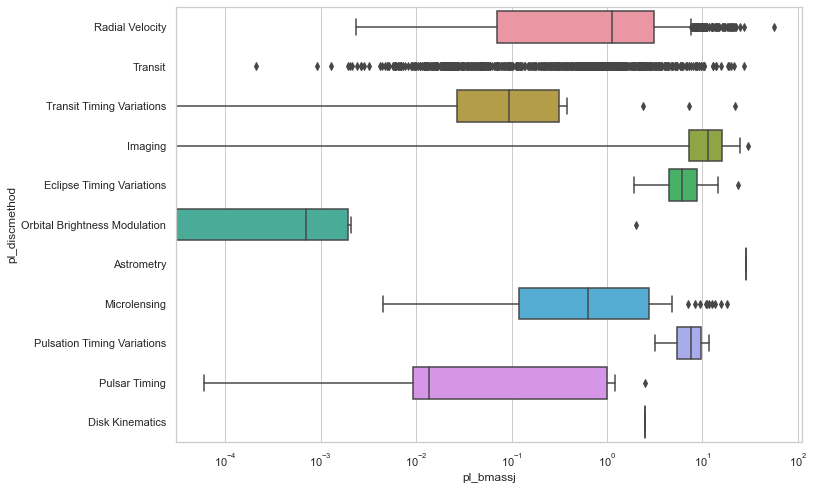

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df_planets, x='pl_bmassj', y='pl_discmethod')
ax.set_xscale('log')
#_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='pl_radj', ylabel='Count'>

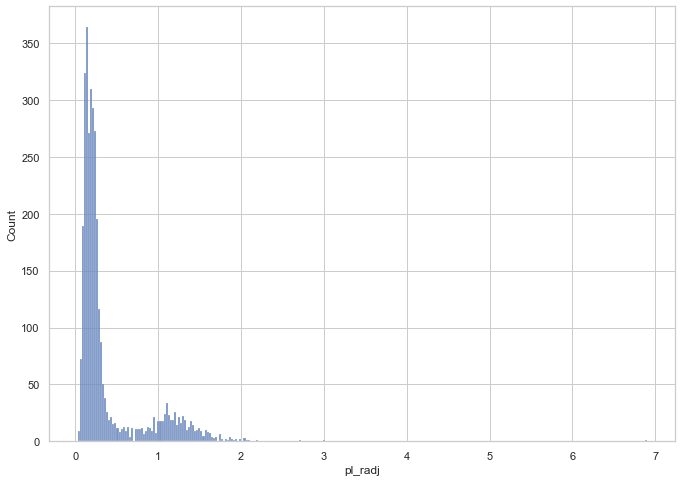

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df_planets[df_planets.pl_radj>0.0].pl_radj)

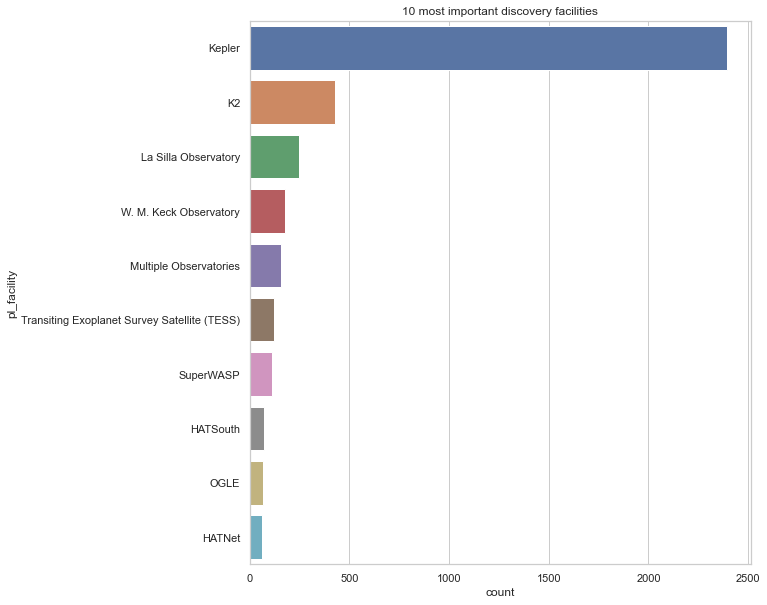

In [11]:
fig, ax = plt.subplots(figsize=(8,10))
sns.countplot(data=df_planets, y='pl_facility', order=df_planets.pl_facility.value_counts().index[:10])
_ = ax.set_title("10 most important discovery facilities")

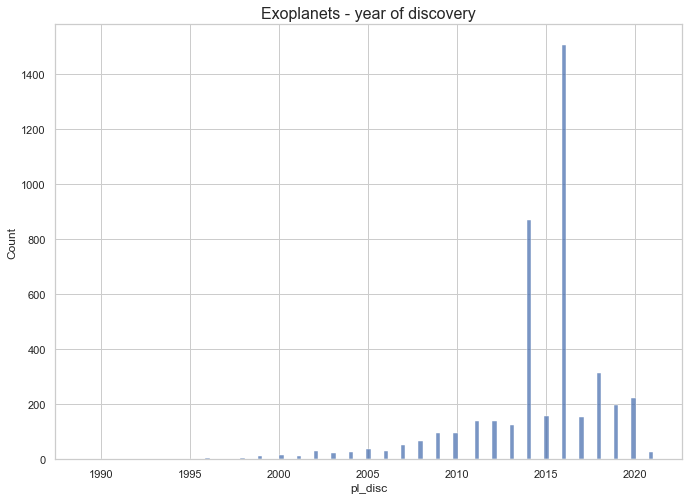

In [18]:
fig, axes = plt.subplots(figsize=(10,8))
ax = sns.histplot(df_planets['pl_disc'])
_ = ax.set_title('Exoplanets - year of discovery', fontsize=16)

<AxesSubplot:xlabel='pl_disc', ylabel='pl_pnum'>

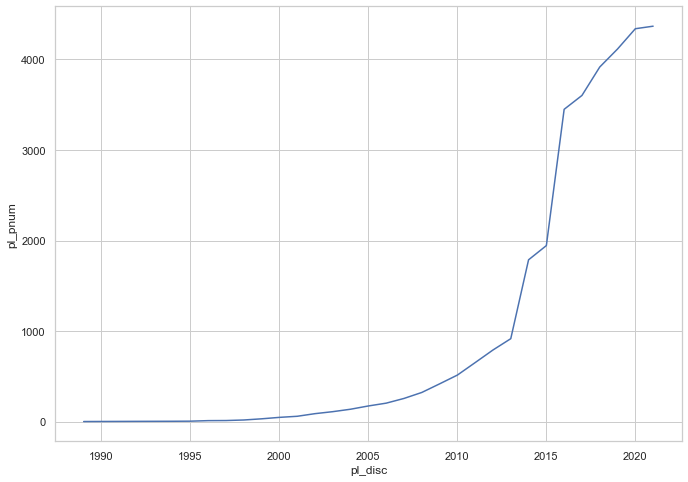

In [41]:
df_plot = df_planets.groupby('pl_disc').pl_pnum.count().cumsum()

fig, axes = plt.subplots(figsize=(10,8))
sns.lineplot(data=df_plot)